In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("bank-full.csv", delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Exploratory Data Analysis

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.duplicated().value_counts()

False    45211
dtype: int64

In [8]:
df[df.duplicated()].shape

(0, 17)

In [9]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [10]:
numerical_feature = [i for i in df.columns if df[i].dtypes!='O']
df[numerical_feature]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [11]:
print(len(numerical_feature))
print(numerical_feature)

7
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
descrete_feature = [i for i in numerical_feature if len(df[i].unique()<25) and i not in numerical_feature]

print("Total count of Descrete Features: ", len(descrete_feature))

Total count of Descrete Features:  0


In [13]:
continuous_feature = [i for i in numerical_feature if i not in descrete_feature]

print("Total counts of Continuous Feature: ", len(continuous_feature))

Total counts of Continuous Feature:  7


In [14]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


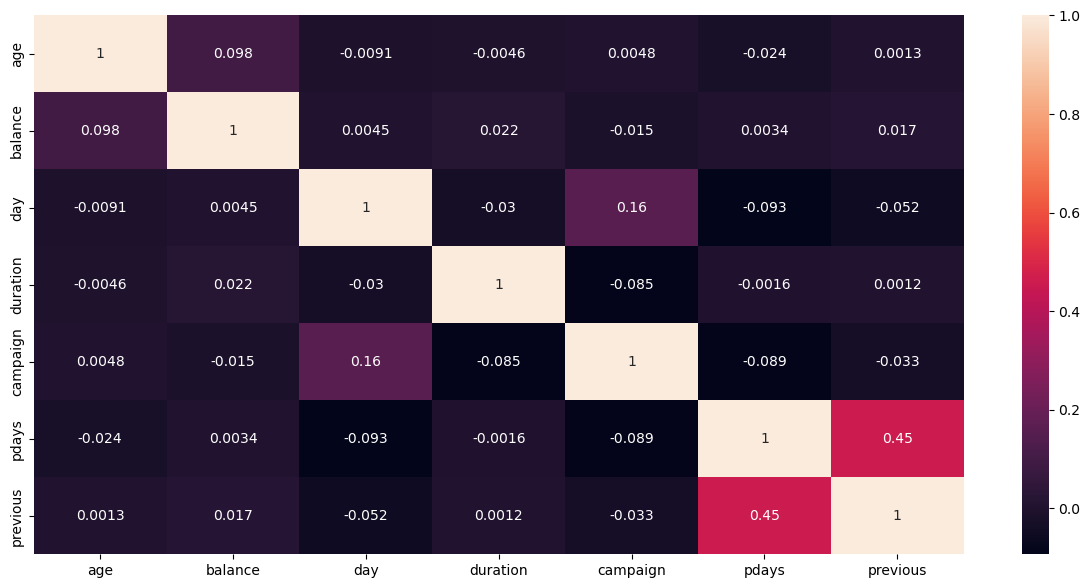

In [15]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

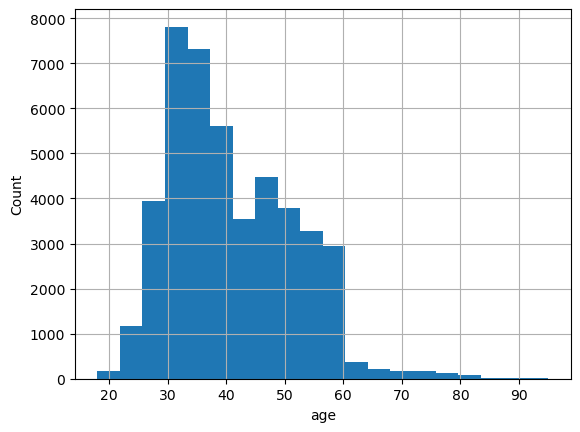

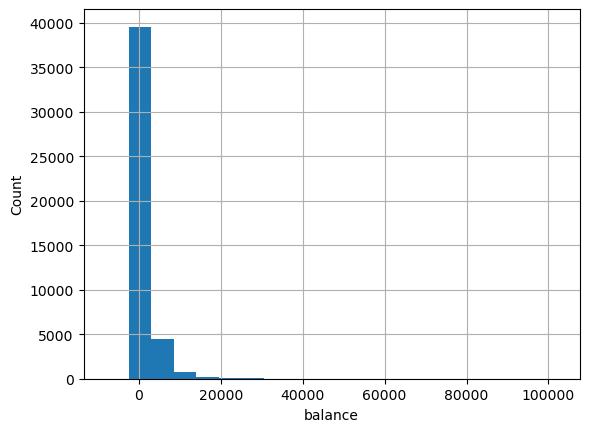

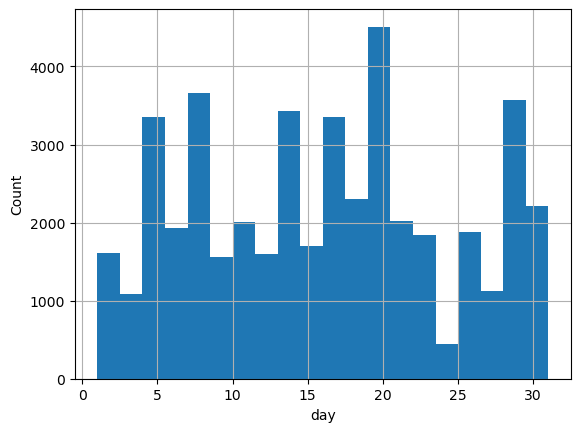

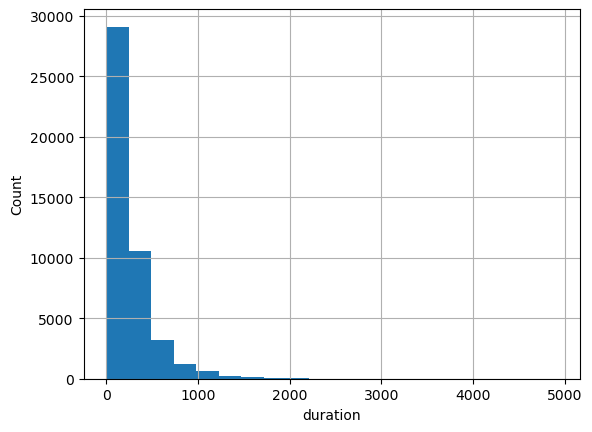

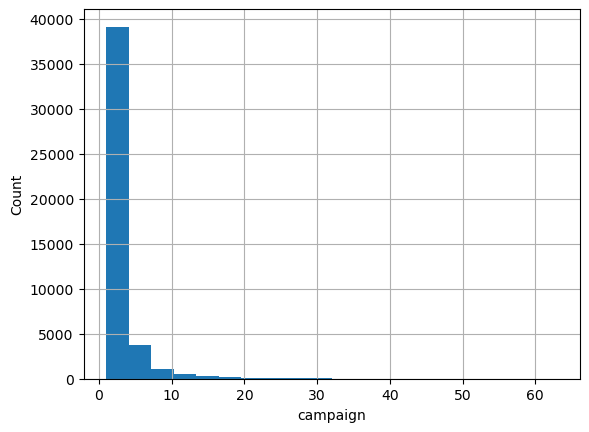

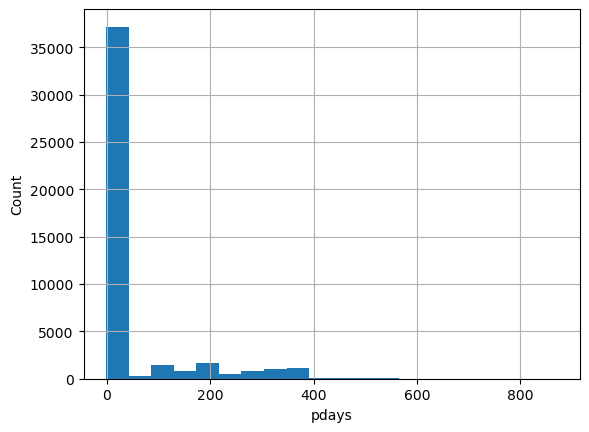

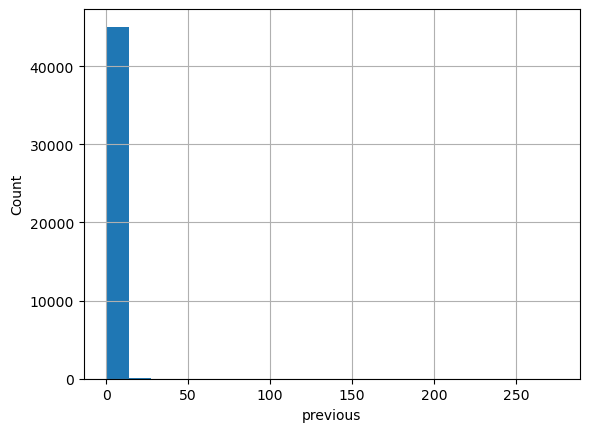

In [16]:
for i in continuous_feature:
    data = df.copy()
    data[i].hist(bins=20)
    plt.ylabel("Count")
    plt.xlabel(i)
    plt.show()

Log Transformation: 

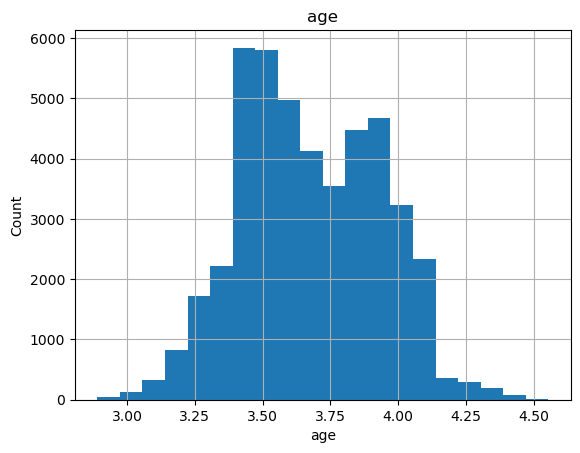

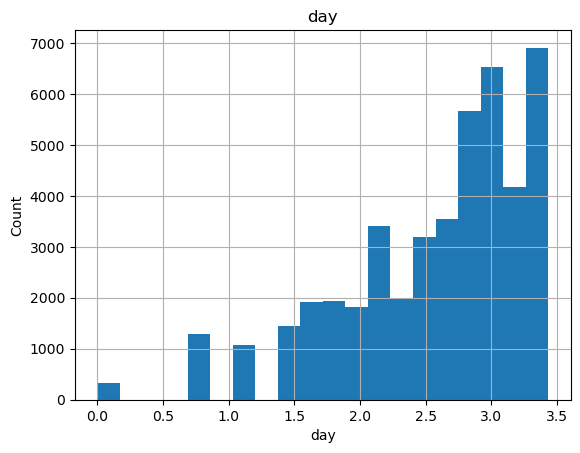

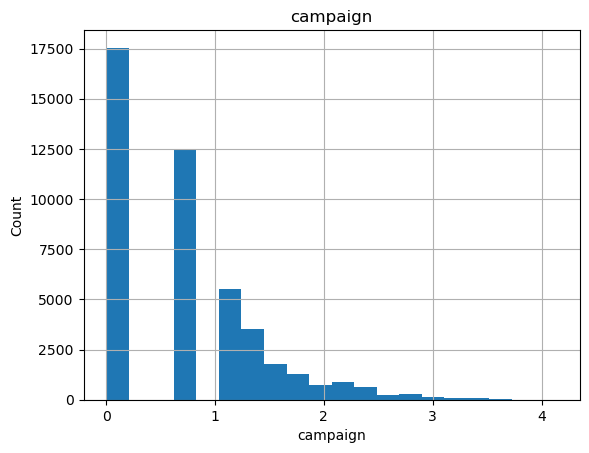

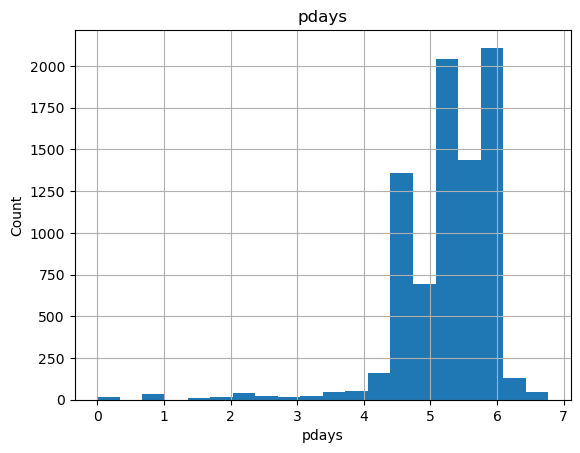

In [17]:
for i in continuous_feature:
    data = df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i] = np.log(data[i])
        data[i].hist(bins=20)
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

Outliers Detection: 

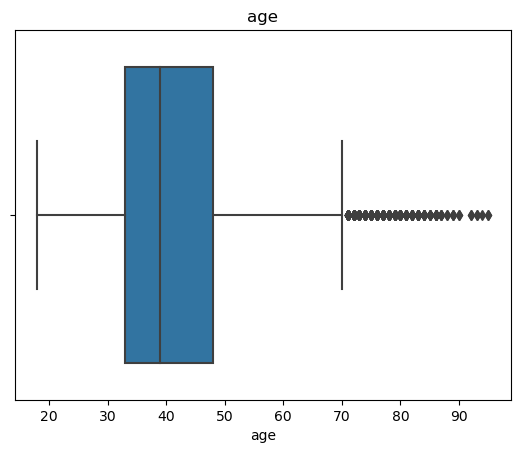

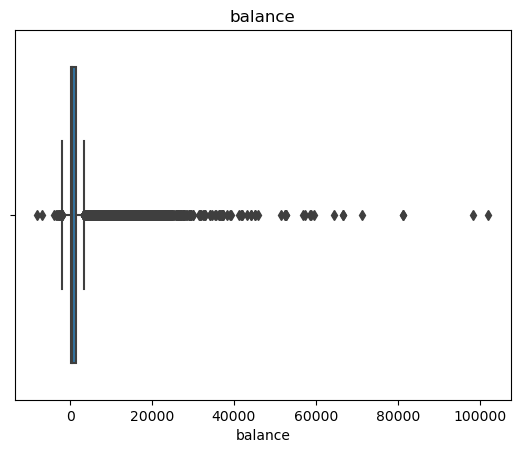

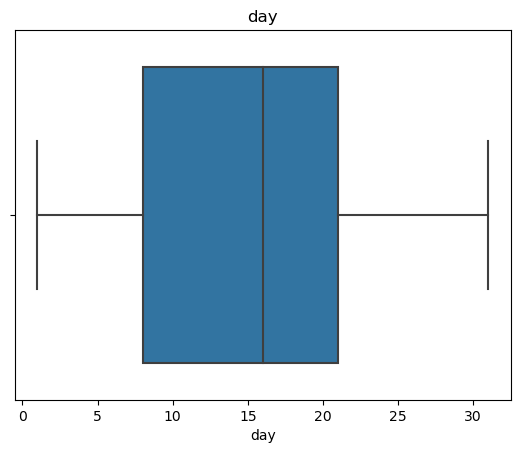

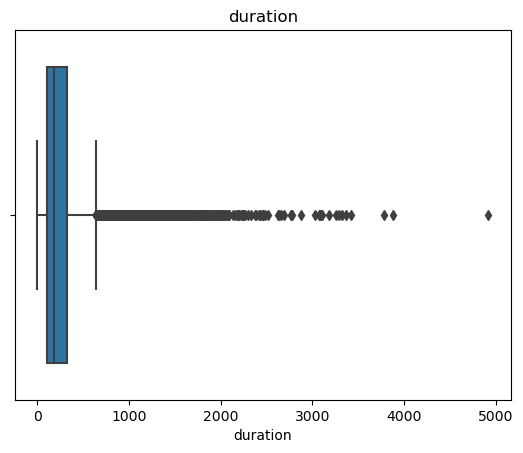

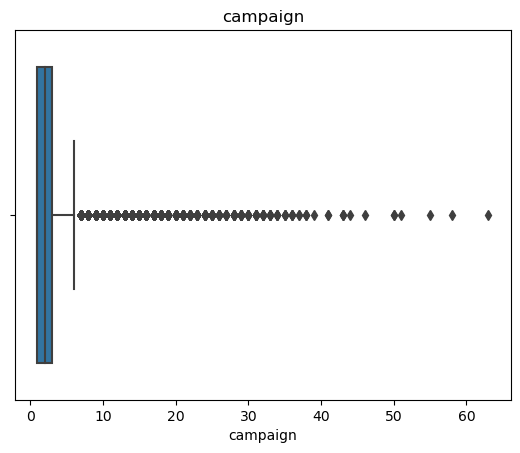

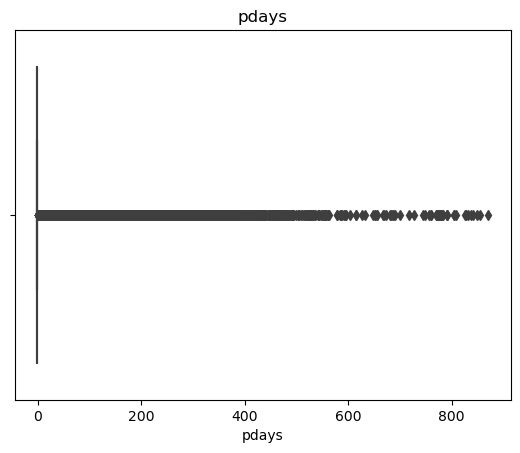

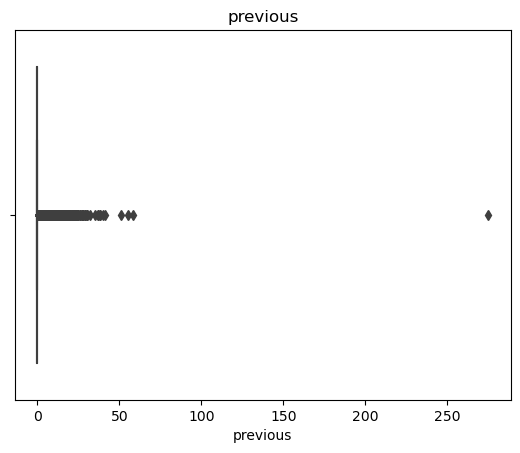

In [18]:
for i in continuous_feature:
    sns.boxplot(i, data=df)
    plt.title(i)
    plt.show()
    

After Log Transformation: 

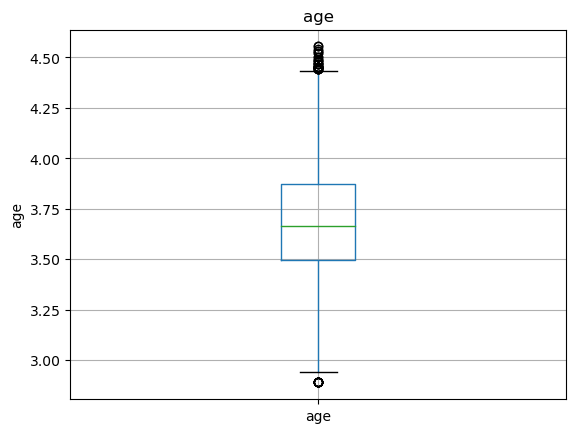

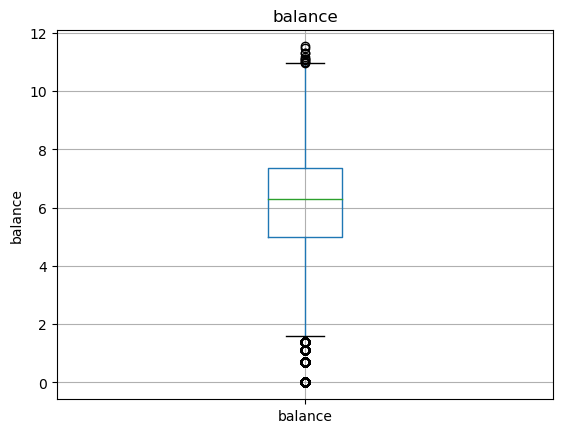

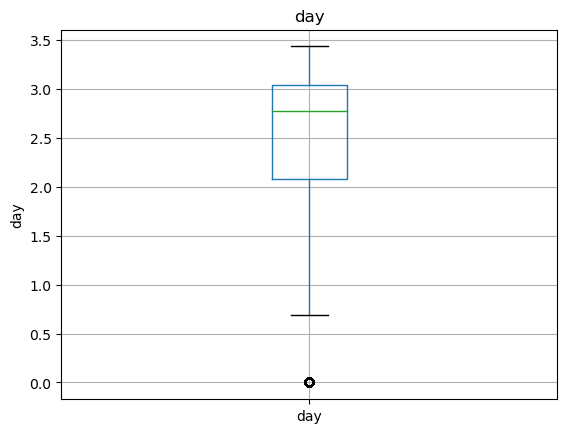

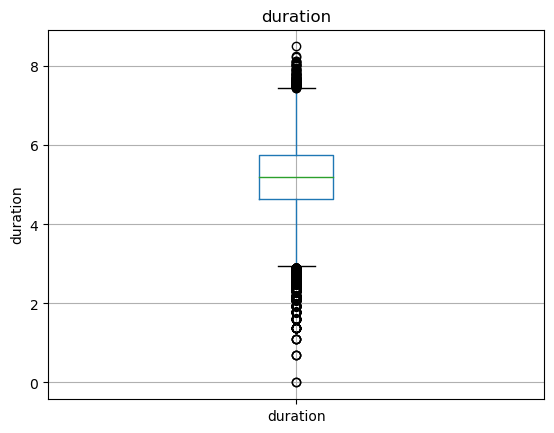

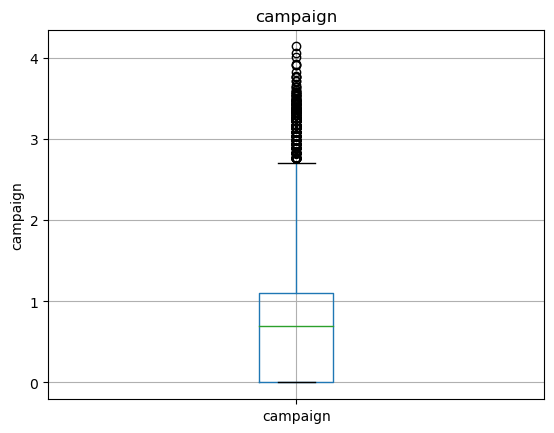

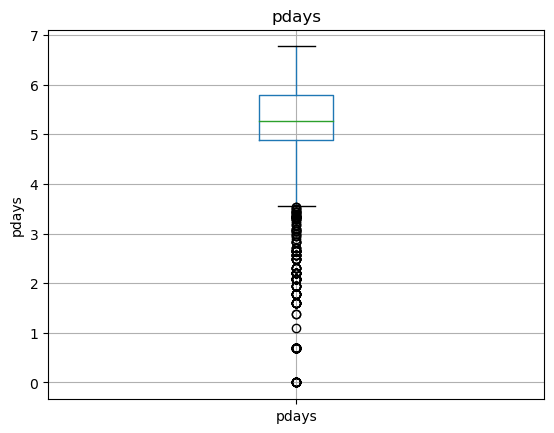

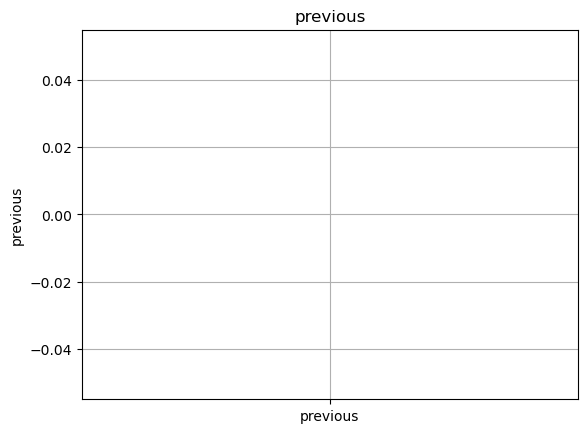

In [19]:
for i in continuous_feature:
    data = df.copy()
    data[i]=np.log(data[i])
    data.boxplot(column=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

Visualizing the distribution of "age" and "balance" :

In [20]:
df[["age", "balance"]].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


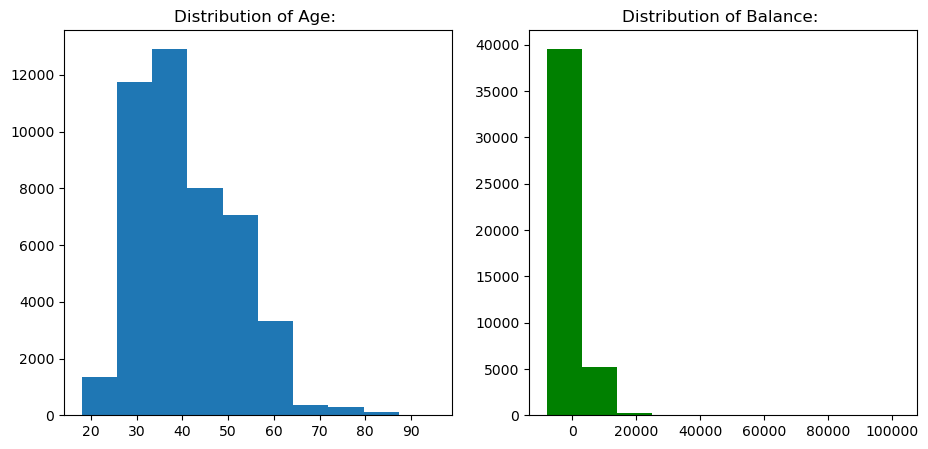

In [21]:
age_bal = plt.figure(figsize=(11,5))

g1 = age_bal.add_subplot(1,2,1)
g2 = age_bal.add_subplot(1,2,2)

g1.hist(df["age"])
g1.set_title("Distribution of Age: ")

g2.hist(df["balance"], color="g")
g2.set_title("Distribution of Balance: ")

plt.show()

Visualizing the relationship between "duration" and "campaign"

In [22]:
df[["duration", "campaign"]].describe()

,duration,campaign
count,45211.000000,45211.000000
mean,258.163080,2.763841
std,257.527812,3.098021
min,0.000000,1.000000
25%,103.000000,1.000000
50%,180.000000,2.000000
75%,319.000000,3.000000
max,4918.000000,63.000000


duration       AxesSubplot(0.125,0.11;0.352273x0.77)
campaign    AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

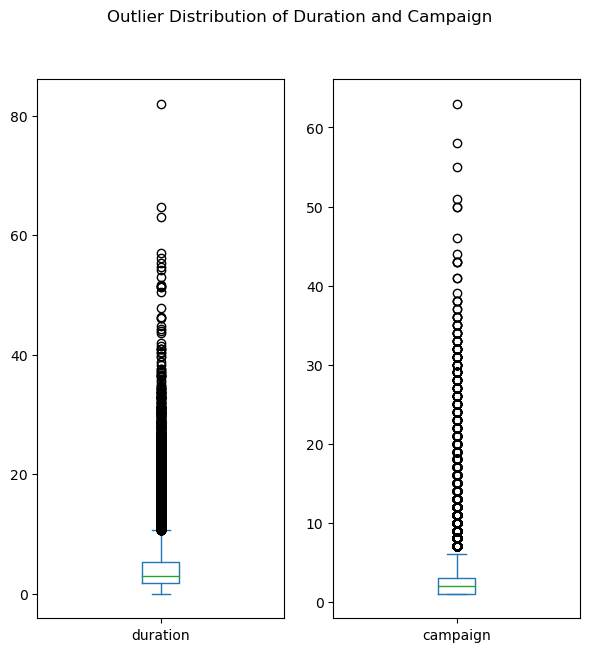

In [23]:
data = df.copy()

data["duration"] = data['duration'].apply(lambda n:n/60).round(2)
data[["duration", "campaign"]].plot(kind="box", figsize=(7,7),
                                   subplots=True, layout=(1,2),
                                   sharex=False, sharey=False,
                                   title="Outlier Distribution of Duration and Campaign")

Visualization of Numerical Columns with respect to Deposit Subscription: 

In [24]:
bal_dep = pd.DataFrame()
bal_dep["balance_yes"] = (df[df['y']=="yes"][['y', 'balance']].describe())["balance"]
bal_dep["balance_no"] = (df[df['y']=="no"][['y','balance']].describe())["balance"]

bal_dep

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and Deposit'}>

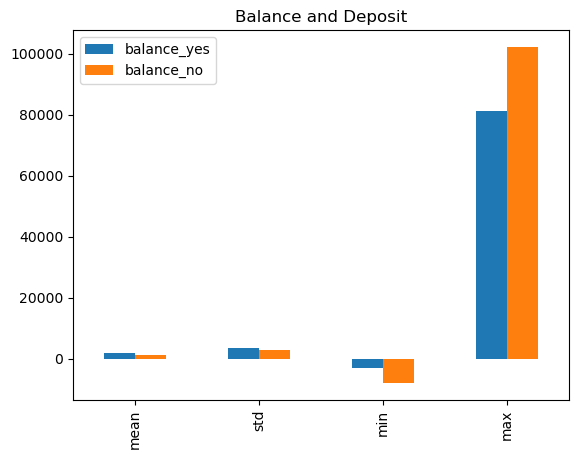

In [25]:
bal_dep.drop(["count","25%","50%","75%"]).plot.bar(title="Balance and Deposit")

Age and Deposit: 

In [26]:
a_dep = pd.DataFrame()
a_dep["age_yes"] = (df[df['y']=="yes"][['y','age']]).describe()['age']
a_dep["age_no"] = (df[df['y']=="no"][['y', 'age']]).describe()['age']

a_dep

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and Deposit'}>

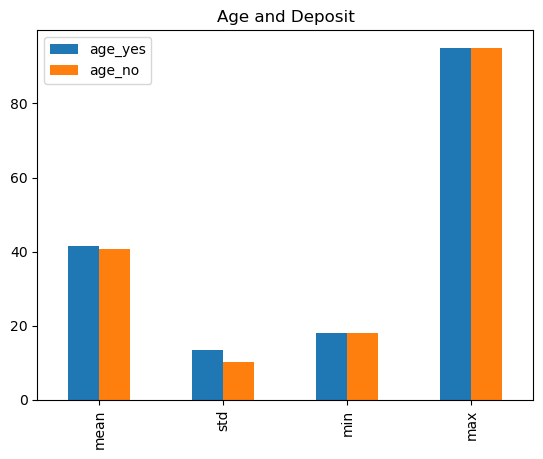

In [27]:
a_dep.drop(["count","25%","50%","75%"]).plot.bar(title="Age and Deposit")

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


campaign and Deposit: 

In [29]:
c_dep = pd.DataFrame()
c_dep["campaign_yes"] = (df[df['y']=='yes'][["y", 'campaign']]).describe()['campaign']
c_dep["campaign_no"] = (df[df['y']=='no'][['y', 'campaign']]).describe()['campaign']

c_dep

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Contracts performed during Campaign and Deposit'}>

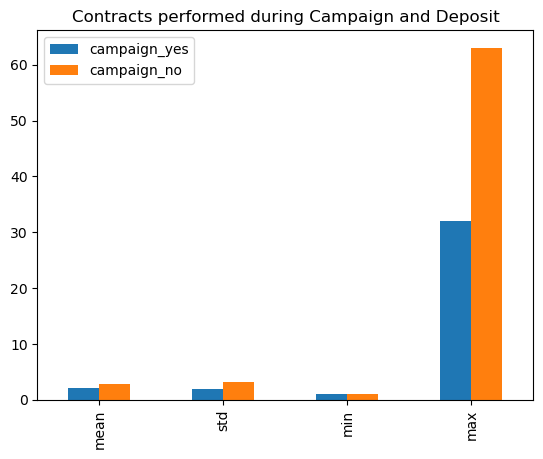

In [30]:
c_dep.drop(["count", '25%', '50%', '75%']).plot.bar(title="Contracts performed during Campaign and Deposit")

Contracts performed during previous_campaign and deposit

In [31]:
p_dep = pd.DataFrame()
p_dep["previous_yes"] = (df[df['y']=='yes'][['y', 'previous']]).describe()['previous']
p_dep["previous_no"] = (df[df['y']=='no'][['y', 'previous']]).describe()['previous']

p_dep

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Contracts performed during previous campaign and deposit'}>

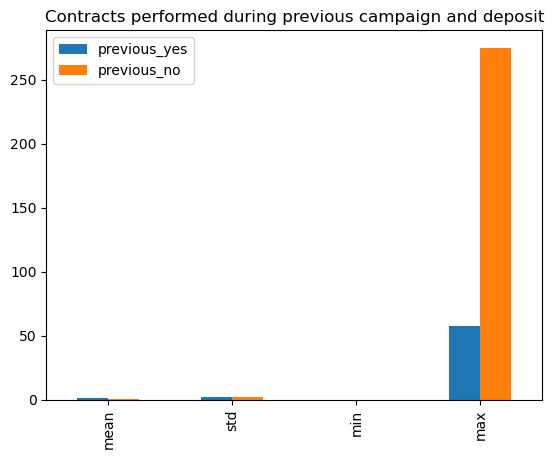

In [32]:
p_dep.drop(['count','25%','50%','75%']).plot.bar(title='Contracts performed during previous campaign and deposit')

In [33]:
categorical_feature = [i for i in df.columns if df[i].dtypes=='O']
print("Number of categorical columns: ", len(categorical_feature))
print("Categorical Features: ", categorical_feature)
df[categorical_feature].head()

Number of categorical columns:  10
Categorical Features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [34]:
for i in categorical_feature:
    print(len(df[i].unique()), " number of unique categorical features are in ", i)

12  number of unique categorical features are in  job
3  number of unique categorical features are in  marital
4  number of unique categorical features are in  education
2  number of unique categorical features are in  default
2  number of unique categorical features are in  housing
2  number of unique categorical features are in  loan
3  number of unique categorical features are in  contact
12  number of unique categorical features are in  month
4  number of unique categorical features are in  poutcome
2  number of unique categorical features are in  y


In [35]:
for i in df.columns:
    if df[i].dtypes=="object":
        unique_cat = len(df[i].unique())
        print("Feature **",i,"** has ",unique_cat, "unique categories")
        print(df[i].value_counts())
        print("\n")

Feature ** job ** has  12 unique categories
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Feature ** marital ** has  3 unique categories
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Feature ** education ** has  4 unique categories
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Feature ** default ** has  2 unique categories
no     44396
yes      815
Name: default, dtype: int64


Feature ** housing ** has  2 unique categories
yes    25130
no     20081
Name: housing, dtype: int64


Feature ** loan ** has  2 unique categories
no     37967
yes     7244
Name: loan, dtype: int64


Feature ** contact ** has  3 unique categories
cellular     29285
unknown  

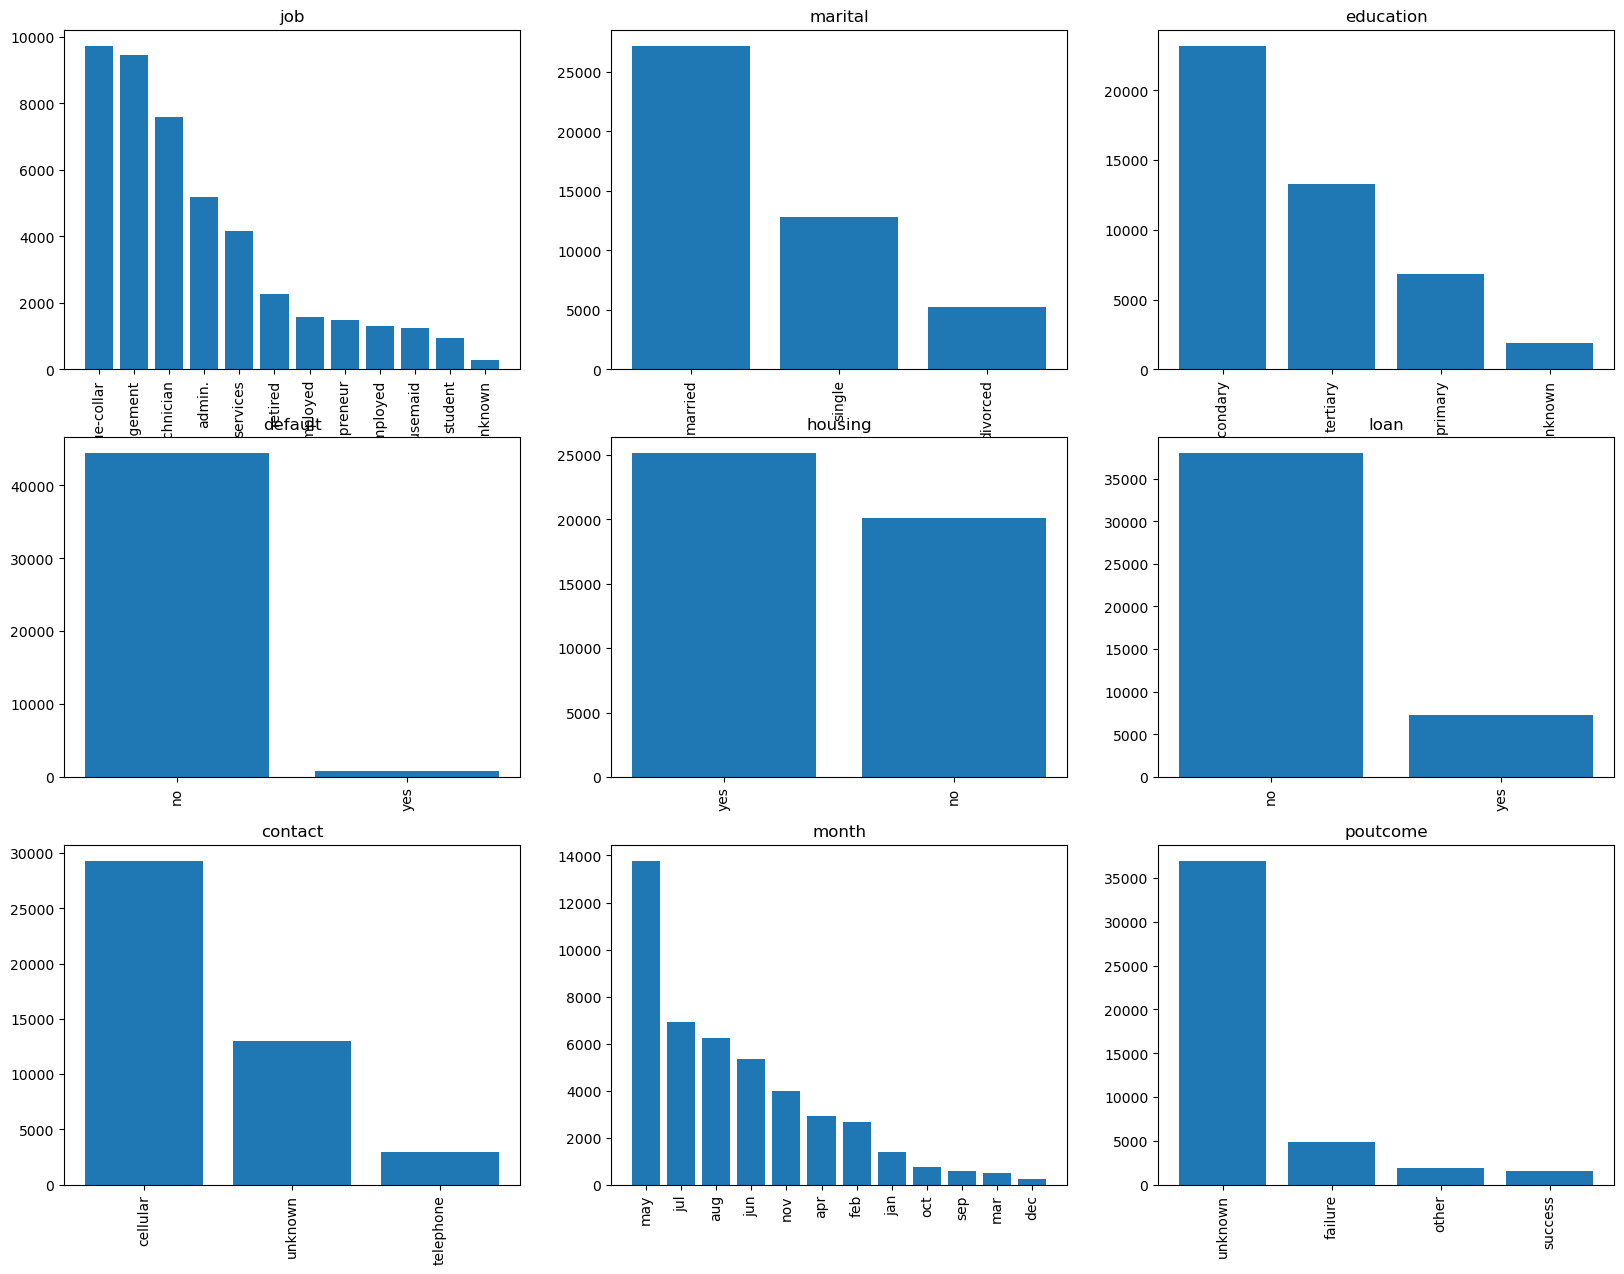

In [38]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Text(0.5, 1.0, 'Jobs')

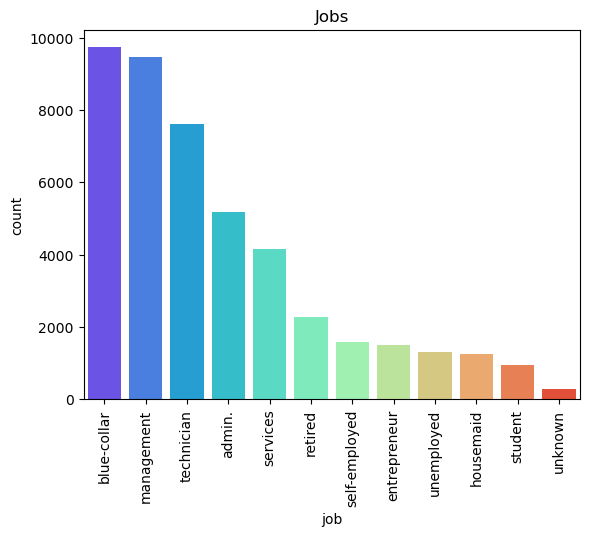

In [40]:
sns.countplot(x='job', data=df, palette='rainbow',
            order=df['job'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital')

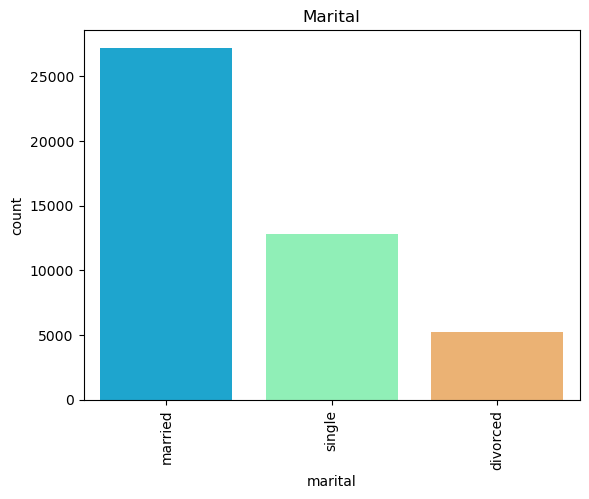

In [41]:
sns.countplot(x='marital', data=df, palette='rainbow',
            order=df['marital'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Marital')

Text(0.5, 1.0, 'Education')

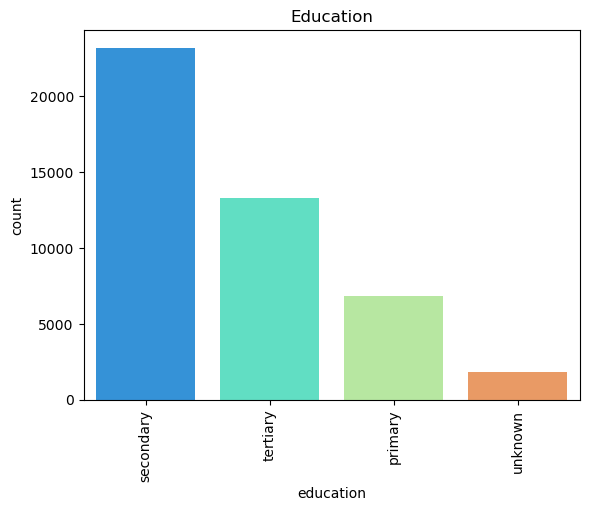

In [42]:
sns.countplot(x='education', data=df, palette='rainbow',
            order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

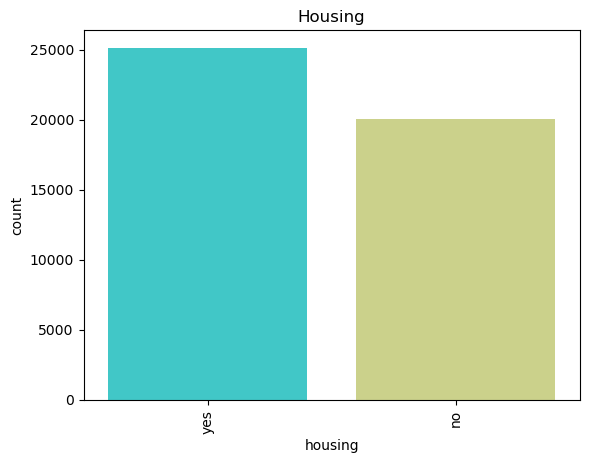

In [43]:
sns.countplot(x='housing', data=df, palette='rainbow',
            order=df['housing'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Housing')

Text(0.5, 1.0, 'Loan')

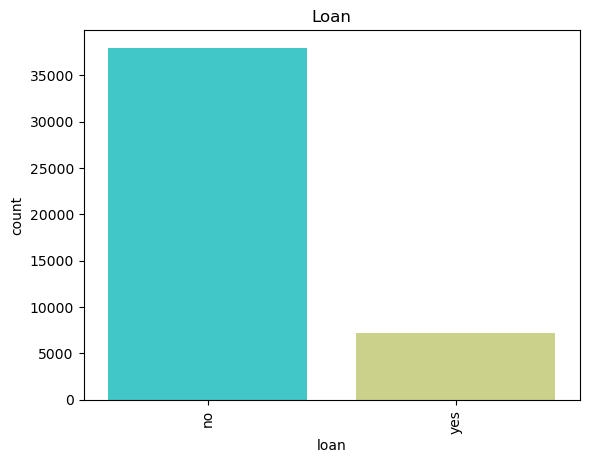

In [44]:
sns.countplot(x='loan', data=df, palette='rainbow',
            order=df['loan'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Loan')

Univariate Analysis:

<AxesSubplot:title={'center':'Job and Deposit'}>

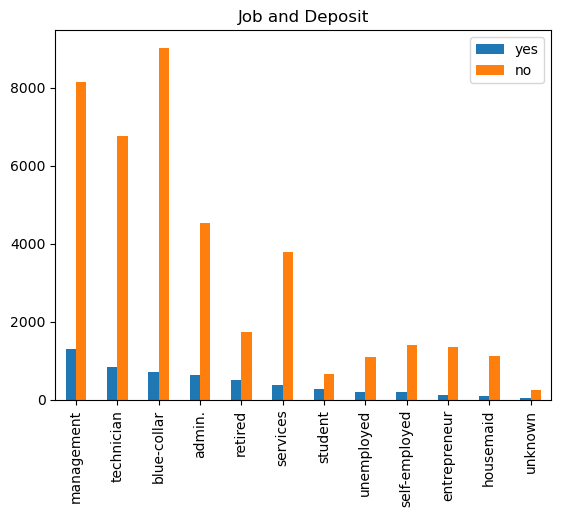

In [45]:
#job and deposit
j_dep = pd.DataFrame()

j_dep['yes'] = df[df['y']=='yes']['job'].value_counts()
j_dep['no'] = df[df['y']=='no']['job'].value_counts()

j_dep.plot.bar(title="Job and Deposit")

<AxesSubplot:xlabel='y', ylabel='job'>

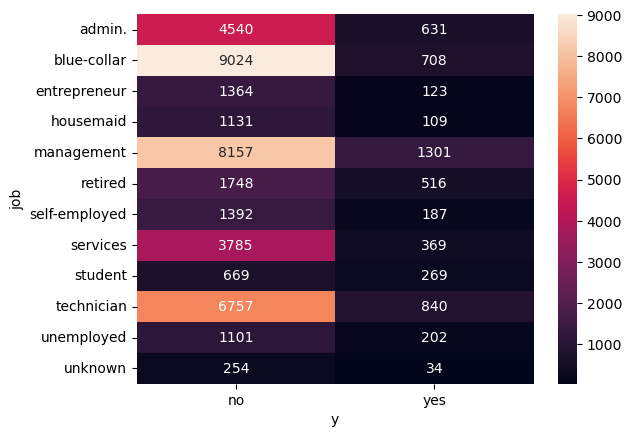

In [46]:
sns.heatmap(pd.crosstab(index=df["job"], columns=df["y"]), annot=True, fmt='g')

<AxesSubplot:title={'center':'Marital Status and Deposit'}>

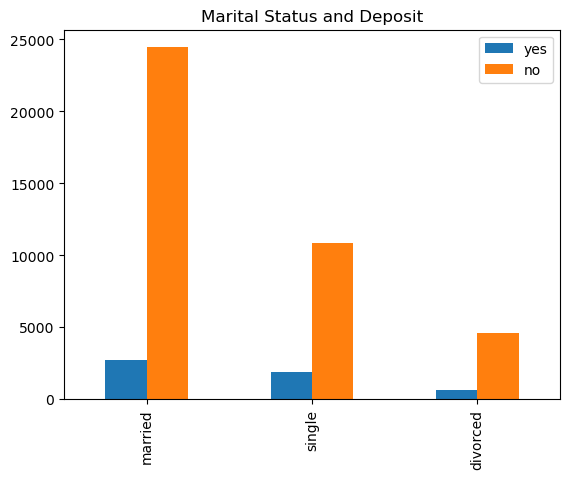

In [47]:
#maritial status and deposit: 
m_dep = pd.DataFrame()
m_dep['yes'] = df[df['y']=='yes']['marital'].value_counts()
m_dep['no'] = df[df['y']=='no']['marital'].value_counts()

m_dep.plot.bar(title="Marital Status and Deposit")

<AxesSubplot:xlabel='y', ylabel='marital'>

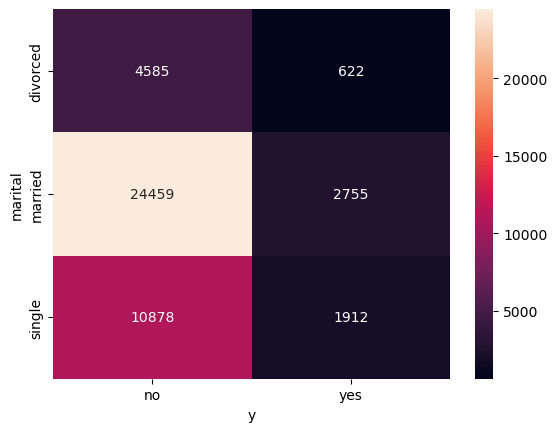

In [48]:
sns.heatmap(pd.crosstab(index=df["marital"], columns=df["y"]), annot=True, fmt='g')

<AxesSubplot:title={'center':'Education and Deposit'}>

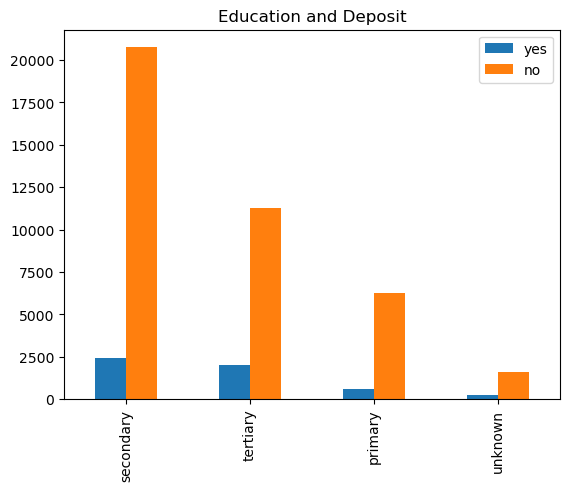

In [49]:
#education and deposit: 
m_dep = pd.DataFrame()
m_dep['yes'] = df[df['y']=='yes']['education'].value_counts()
m_dep['no'] = df[df['y']=='no']['education'].value_counts()

m_dep.plot.bar(title="Education and Deposit")

<AxesSubplot:xlabel='y', ylabel='education'>

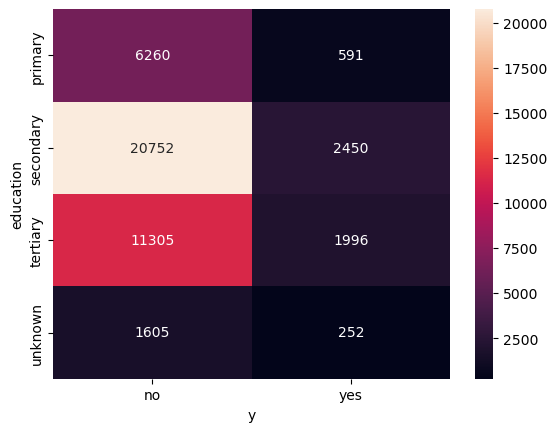

In [50]:
sns.heatmap(pd.crosstab(index=df["education"], columns=df["y"]), annot=True, fmt='g')

<AxesSubplot:title={'center':'Type of Contact and Deposit'}>

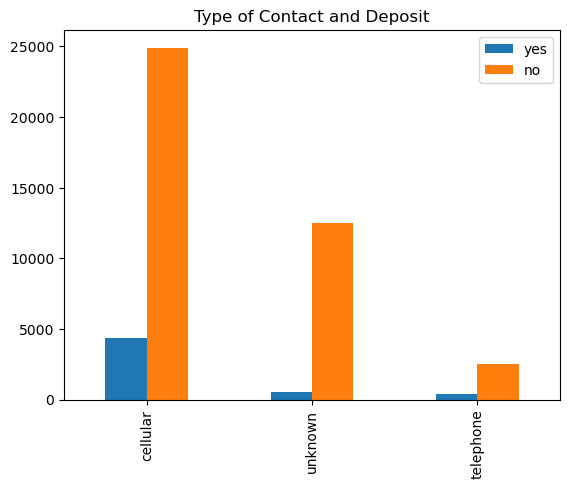

In [51]:
#tytpe of contact and deposit:
c_dep = pd.DataFrame()
c_dep['yes'] = df[df['y']=='yes']['contact'].value_counts()
c_dep['no'] = df[df['y']=='no']['contact'].value_counts()

c_dep.plot.bar(title="Type of Contact and Deposit")

<AxesSubplot:xlabel='y', ylabel='contact'>

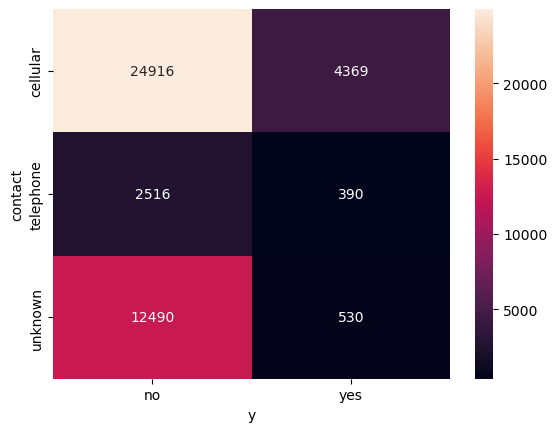

In [52]:
sns.heatmap(pd.crosstab(index=df["contact"], columns=df["y"]), annot=True, fmt='g')

<AxesSubplot:title={'center':'Previous outcome and Deposit'}>

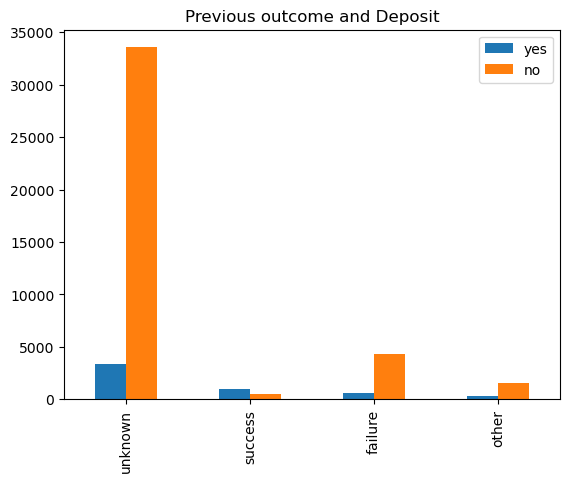

In [53]:
#previous outcome and deposit: 
p_dep = pd.DataFrame()
p_dep['yes'] = df[df['y']=='yes']['poutcome'].value_counts()
p_dep['no'] = df[df['y']=='no']['poutcome'].value_counts()

p_dep.plot.bar(title='Previous outcome and Deposit')

<AxesSubplot:xlabel='y', ylabel='poutcome'>

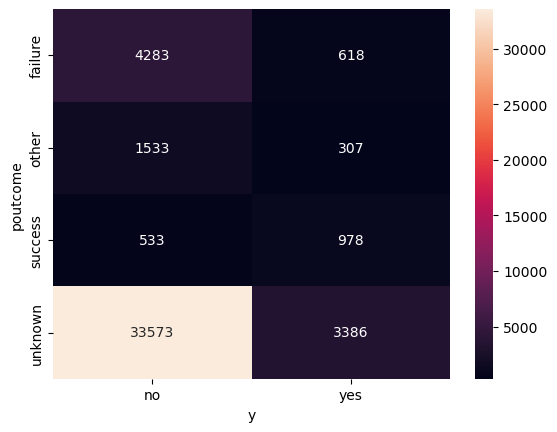

In [54]:
sns.heatmap(pd.crosstab(index=df['poutcome'], columns = df['y']), annot=True, fmt='g')

<AxesSubplot:title={'center':'Loan and Deposit'}>

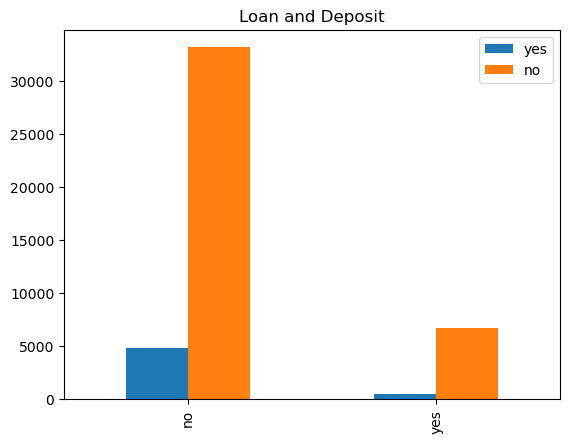

In [55]:
#loan and deposit:
l_dep = pd.DataFrame()
l_dep['yes'] = df[df['y']=='yes']['loan'].value_counts()
l_dep['no'] = df[df['y']=='no']['loan'].value_counts()

l_dep.plot.bar(title='Loan and Deposit')

<AxesSubplot:xlabel='y', ylabel='loan'>

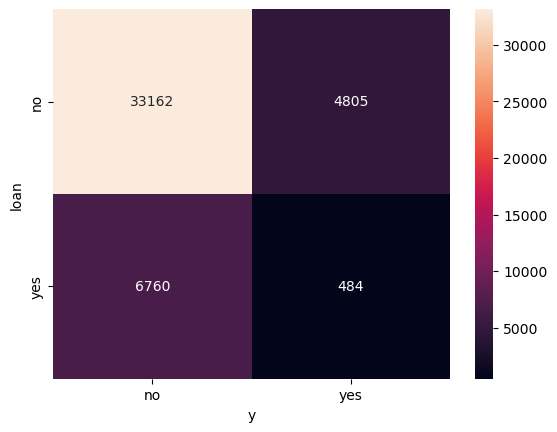

In [56]:
sns.heatmap(pd.crosstab(index=df['loan'], columns=df['y']), annot=True, fmt='g')

Analyzing the Relationship between Continuous features with Target Feature

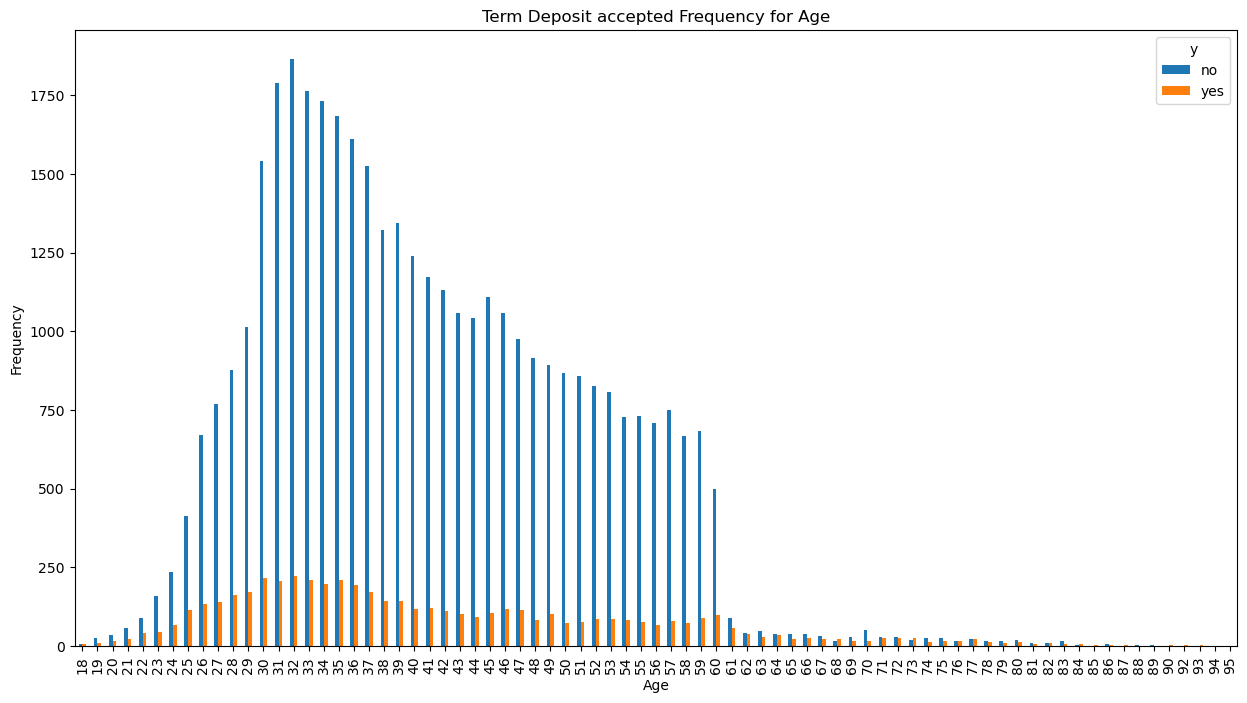

In [57]:
pd.crosstab(df['age'], df['y']).plot(kind='bar', figsize=(15,8))
plt.title("Term Deposit accepted Frequency for Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

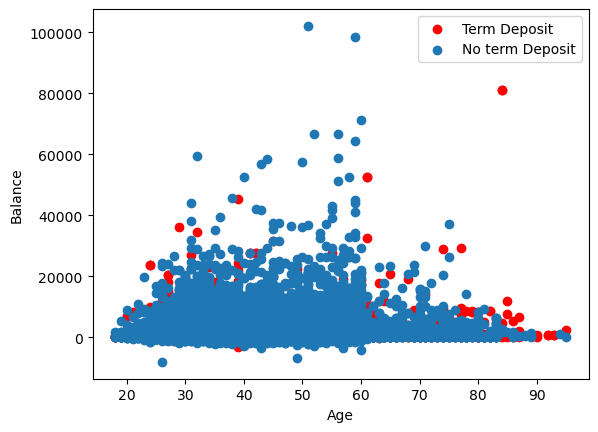

In [58]:
plt.scatter(x=df.age[df.y=='yes'], y=df.balance[(df.y=='yes')], c='red')
plt.scatter(x=df.age[df.y=='no'], y=df.balance[(df.y=='no')])
plt.legend(['Term Deposit', 'No term Deposit'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

Visualizing the Subscription and contract rate with respect to Age Groups: 

In [59]:
lst = [df]
for column in lst:
    column.loc[column["age"] <30, "age_group"] = 20
    column.loc[(column["age"]>=30) & (column["age"]<40), "age_group"] = 30
    column.loc[(column['age']>=40) & (column['age']<50), 'age_group'] = 40
    column.loc[(column["age"]>=50) & (column['age']<60), 'age_group'] = 50
    column.loc[column['age']>=60, 'age_group'] = 60
    
count_age = pd.crosstab(df['y'], df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age = count_age.transpose()

age = pd.DataFrame(df['age_group'].value_counts())
age


,age_group
30.0,18089
40.0,11655
50.0,8410
20.0,5273
60.0,1784


In [60]:
age['%Contracted'] = pd.DataFrame(age['age_group']*100/age['age_group'].sum())
age

,age_group,%Contracted
30.0,18089,40.010175
40.0,11655,25.779125
50.0,8410,18.601668
20.0,5273,11.663091
60.0,1784,3.945942


In [61]:
age['%Subscription'] = pd.DataFrame(count_age['yes'])
age

,age_group,%Contracted,%Subscription
30.0,18089,40.010175,10.575488
40.0,11655,25.779125,9.120549
50.0,8410,18.601668,9.334126
20.0,5273,11.663091,17.599090
60.0,1784,3.945942,33.632287


In [62]:
age['%Refused'] = pd.DataFrame(count_age['no'])
age

,age_group,%Contracted,%Subscription,%Refused
30.0,18089,40.010175,10.575488,89.424512
40.0,11655,25.779125,9.120549,90.879451
50.0,8410,18.601668,9.334126,90.665874
20.0,5273,11.663091,17.599090,82.400910
60.0,1784,3.945942,33.632287,66.367713


In [63]:
age.drop('age_group', axis=1, inplace=True)
age

,%Contracted,%Subscription,%Refused
30.0,40.010175,10.575488,89.424512
40.0,25.779125,9.120549,90.879451
50.0,18.601668,9.334126,90.665874
20.0,11.663091,17.599090,82.400910
60.0,3.945942,33.632287,66.367713


In [64]:
age

,%Contracted,%Subscription,%Refused
30.0,40.010175,10.575488,89.424512
40.0,25.779125,9.120549,90.879451
50.0,18.601668,9.334126,90.665874
20.0,11.663091,17.599090,82.400910
60.0,3.945942,33.632287,66.367713


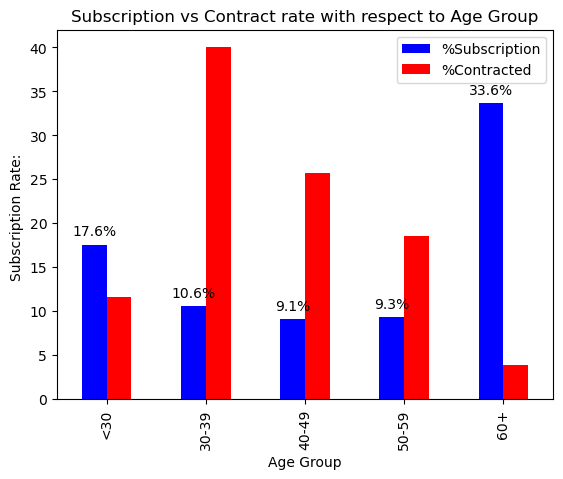

In [65]:
age['age'] = [30,40,50,20,60]
age = age.sort_values('age', ascending=True)

plot_age = age[['%Subscription','%Contracted']].plot(kind='bar', color=('b', 'r'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate: ')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'))
plt.title('Subscription vs Contract rate with respect to Age Group')

for rec, label in zip(plot_age.patches, 
                     (age['%Subscription'].round(1).astype(str))):
                      plot_age.text(rec.get_x() + rec.get_width()/2,
                                    rec.get_height() + 1,
                                    label+'%',
                                    ha='center',
                                    color='black')
    

In [66]:
lst = [df]
for column in lst:
    column.loc[column["balance"] <= 0, "balance_group"] = 'no balance'
    column.loc[(column["balance"]>0) & (column["balance"]<=1000), "balance_group"] = 'low balance'
    column.loc[(column['balance']>1000) & (column['balance']<=5000), 'balance_group'] = 'average_balance'
    column.loc[column['balance']>5000, 'balance_group'] = 'high balance'
    
count_bal = pd.crosstab(df['y'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_bal = count_bal.transpose()

balances = pd.DataFrame(df['balance_group'].value_counts())
balances


,balance_group
low balance,23300
average_balance,11786
no balance,7280
high balance,2845


In [67]:
balances['%Contracted'] = pd.DataFrame(balances['balance_group']*100/balances['balance_group'].sum())
balances

,balance_group,%Contracted
low balance,23300,51.536131
average_balance,11786,26.068877
no balance,7280,16.102276
high balance,2845,6.292716


In [68]:
balances['%Subscription'] = pd.DataFrame(balances['balance_group'])
balances

,balance_group,%Contracted,%Subscription
low balance,23300,51.536131,23300
average_balance,11786,26.068877,11786
no balance,7280,16.102276,7280
high balance,2845,6.292716,2845


In [69]:
balances['%Subscription'] = pd.DataFrame(count_bal['yes'])
balances

,balance_group,%Contracted,%Subscription
low balance,23300,51.536131,10.896996
average_balance,11786,26.068877,15.331750
no balance,7280,16.102276,6.895604
high balance,2845,6.292716,15.500879


In [70]:
balances.drop("balance_group",inplace=True, axis=1)

In [71]:
balances

,%Contracted,%Subscription
low balance,51.536131,10.896996
average_balance,26.068877,15.331750
no balance,16.102276,6.895604
high balance,6.292716,15.500879


In [72]:
balances['bal'] = [2,0,1,3]

In [73]:
balances

,%Contracted,%Subscription,bal
low balance,51.536131,10.896996,2
average_balance,26.068877,15.331750,0
no balance,16.102276,6.895604,1
high balance,6.292716,15.500879,3


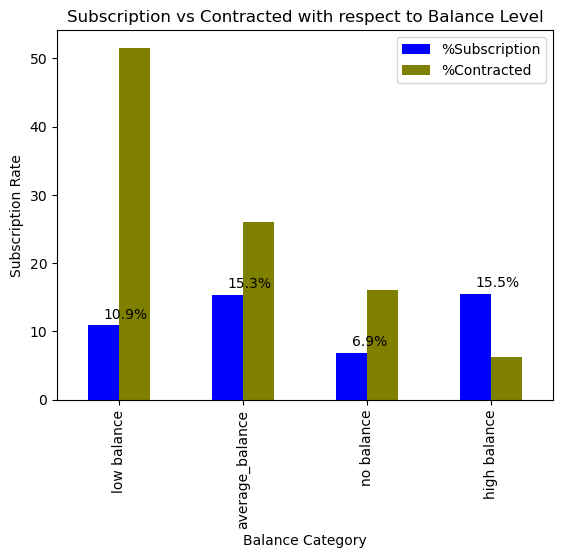

In [74]:
plot_bal = balances[['%Subscription', '%Contracted']].plot(kind='bar', 
                                                         color=('blue', 'olive'))
plt.title("Subscription vs Contracted with respect to Balance Level")
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')

for rec, label in zip(plot_bal.patches, 
                     balances['%Subscription'].round(1).astype(str)):
    plot_bal.text(rec.get_x() + rec.get_width()/2,
                 rec.get_height()+1,
                 label+'%',
                 color='black')

Visualizing Subscription rate by Age and Balance

In [75]:
data = df.copy()
data.rename(index=str, columns={'y':'response'}, inplace=True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x=="no" else 1)
    return data[new_column].value_counts()

convert(data, 'response_binary', 'response')

0    39922
1     5289
Name: response_binary, dtype: int64

In [76]:
age_bal_1 = pd.DataFrame(data.groupby(['age_group', 'balance_group'])['response_binary'].sum())
age_bal_2 = pd.DataFrame(data.groupby(['age_group', 'balance_group'])['response'].count())

age_bal_1['response'] = age_bal_2['response']
age_bal_1['response_rate'] = age_bal_1['response_binary']/(age_bal_1['response'])

In [77]:
age_bal_2

response
age_group balance_group            
20.0      average_balance      1091
          high balance          210
          low balance          3212
          no balance            760
30.0      average_balance      4389
          high balance         1009
          low balance          9712
          no balance           2979
40.0      average_balance      3098
          high balance          724
          low balance          5793
          no balance           2040
50.0      average_balance      2502
          high balance          697
          low balance          3887
          no balance           1324
60.0      average_balance       706
          high balance          205
          low balance           696
          no balance            177

In [78]:
age_bal_1

response_binary  response  response_rate
age_group balance_group                                            
20.0      average_balance              245      1091       0.224565
          high balance                  50       210       0.238095
          low balance                  556      3212       0.173101
          no balance                    77       760       0.101316
30.0      average_balance              613      4389       0.139667
          high balance                 138      1009       0.136769
          low balance                  988      9712       0.101730
          no balance                   174      2979       0.058409
40.0      average_balance              379      3098       0.122337
          high balance                  94       724       0.129834
          low balance                  459      5793       0.079234
          no balance                   131      2040       0.064216
50.0      average_balance              308      2502       0.123102
          high balance                  90       697       0.129125
          low balance                  303      3887       0.077952
          no balance                    84      1324       0.063444
60.0      average_balance              262       706       0.371105
          high balance                  69       205       0.336585
          low balance                  233       696       0.334770
          no balance                    36       177       0.203390

In [79]:
age_bal_1.drop(['response_binary', 'response'], axis=1, inplace=True)
age_bal_1 = age_bal_1.unstack()

In [80]:
age_bal_1

response_rate                                    
balance_group average_balance high balance low balance no balance
age_group                                                        
20.0                 0.224565     0.238095    0.173101   0.101316
30.0                 0.139667     0.136769    0.101730   0.058409
40.0                 0.122337     0.129834    0.079234   0.064216
50.0                 0.123102     0.129125    0.077952   0.063444
60.0                 0.371105     0.336585    0.334770   0.203390

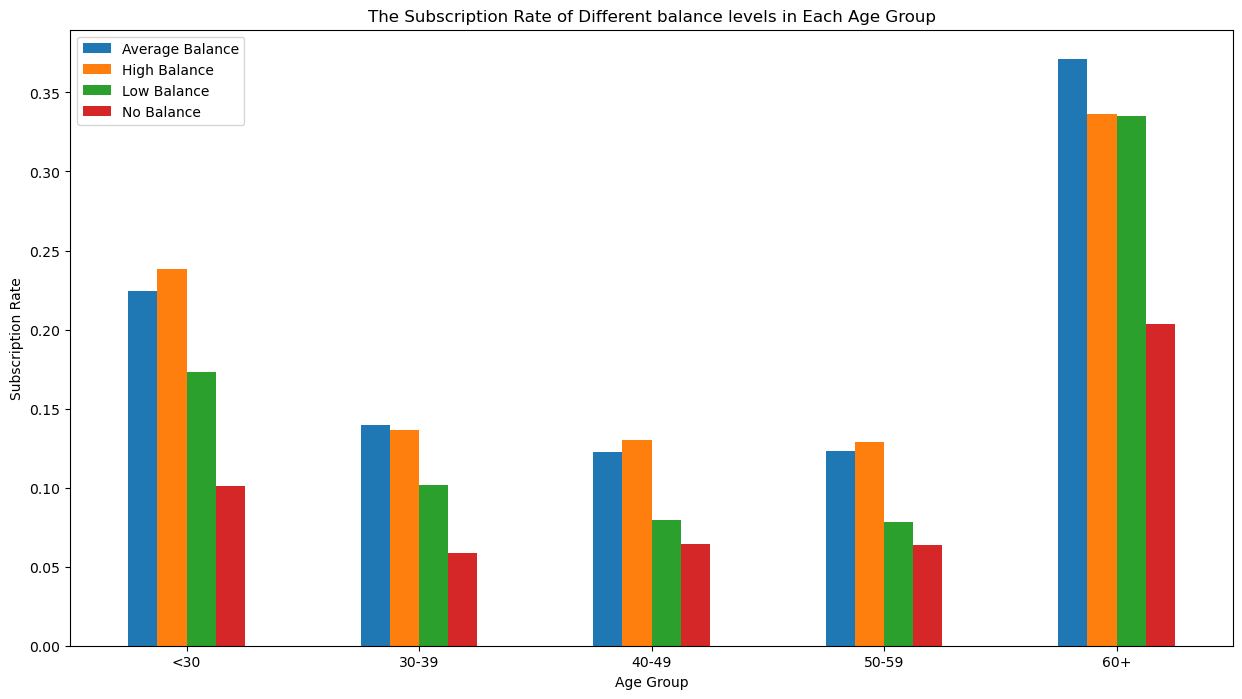

In [81]:
age_bal = age_bal_1.plot(kind='bar', figsize=(15,8))

plt.xticks(np.arange(5), ('<30', '30-39', '40-49','50-59', '60+'), rotation='horizontal')

plt.legend(['Average Balance', 'High Balance', 'Low Balance', 'No Balance'], loc='best', ncol=1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different balance levels in Each Age Group')
plt.show()

Visualize the subscription rate by job

In [82]:
count_job_respond = pd.crosstab(data['response'], data['job']).apply(lambda x: x/x.sum() * 100)
count_job_respond

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [83]:
count_job_respond = count_job_respond.transpose()
count_job_respond

response,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


In [ ]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription

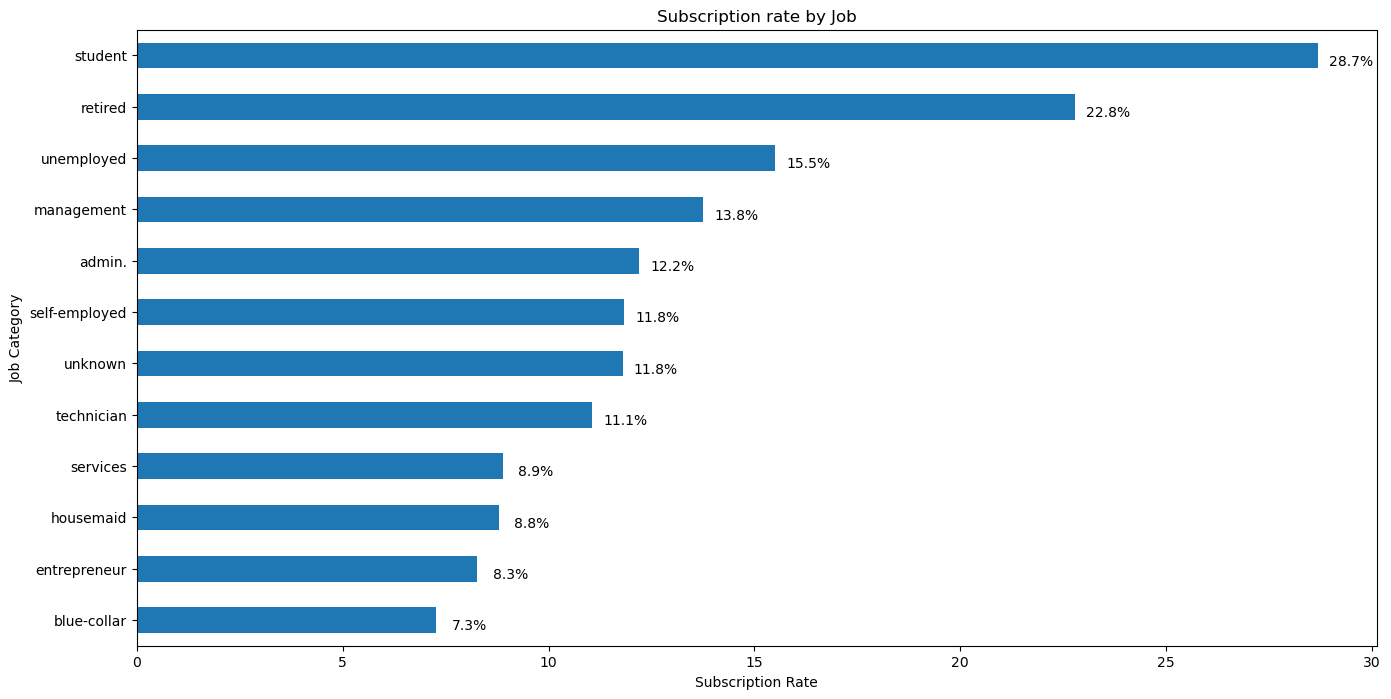

In [87]:
plot_job = count_job_respond['yes'].sort_values(ascending=True).plot(kind='barh', figsize=(16,8))
plt.title('Subscription rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

for rec, label in zip(plot_job.patches,
                     count_job_respond['yes'].sort_values(ascending=True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8,
                 rec.get_y() + rec.get_height()-0.5,
                 label+'%',
                 ha='center',
                 va='bottom')


Visualizing the Subscription and Contact rate by Month: 

In [88]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'june':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1 = df.copy()
df1 = df1.replace(order)

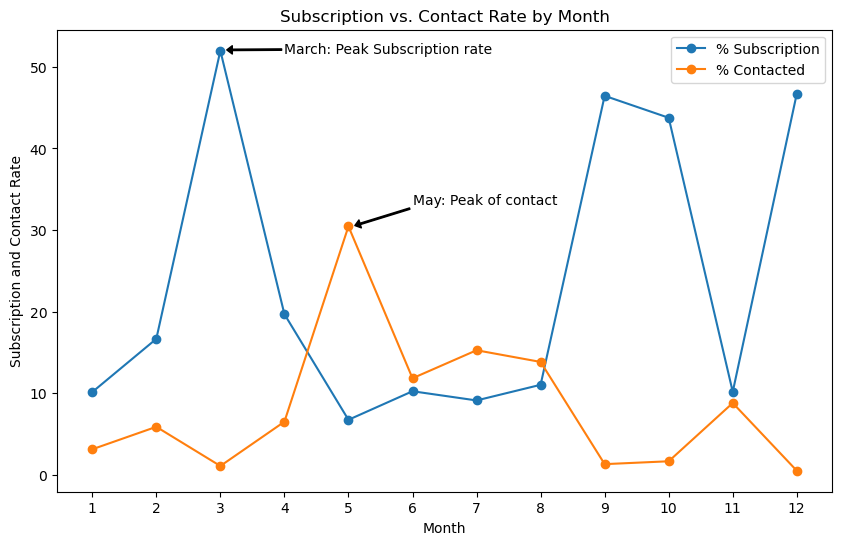

In [89]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['y'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [90]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50.0,average_balance
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40.0,low balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30.0,low balance
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40.0,average_balance
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30.0,low balance


Visualizing the Subscription Rate by Education:

In [91]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [97]:
count_education_res = pd.crosstab(df['y'], df['education']).apply(lambda x: x/x.sum()*100)
count_education_res = count_education_res.transpose()
count_education_res

y,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


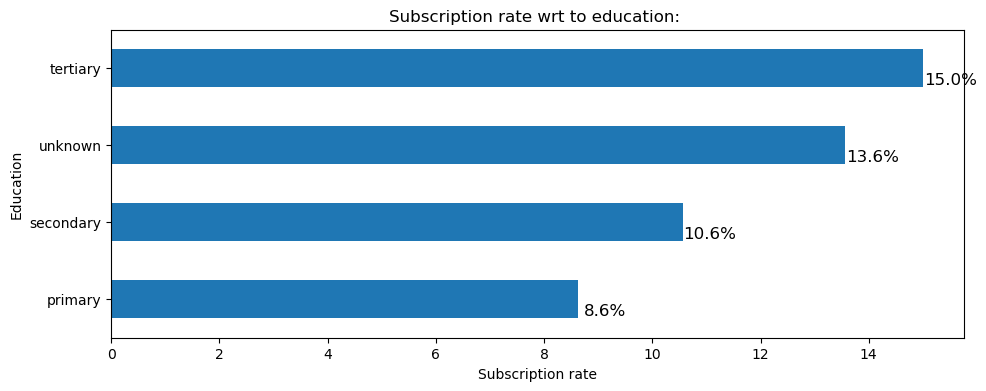

In [98]:
plot_education = count_education_res['yes'].sort_values(ascending=True).plot(kind='barh', figsize=(11,4))
plt.title('Subscription rate wrt to education: ')
plt.xlabel('Subscription rate')
plt.ylabel('Education')

for rec, label in zip(plot_education.patches,
                      count_education_res['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom',
                fontsize = 'large')

Cleaning the Data: 

In [99]:
cols = [i for i in df.columns]
col_missing = []

for i in cols:
    if 'unknown' in df[i].values:
        col_missing.append(i)
        
print("Missing values in Columns with 'Unknown: '", col_missing)

Missing values in Columns with 'Unknown: ' ['job', 'education', 'contact', 'poutcome']


In [100]:
print("'Unknown counts: '")
for i in col_missing:
    print(i, '-', df[df[i].str.contains('unknown')][i].count())

'Unknown counts: '
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [101]:
print(df.groupby(df['job'])['job'].count())

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64


In [102]:
print(df.groupby(df['education'])['education'].count())

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64


In [103]:
print(df.groupby(df['poutcome'])['poutcome'].count())

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64


In [104]:
print(df.groupby(df['contact'])['contact'].count())

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64


Transforming the Data: 

In [105]:
new_df = df.copy()

In [106]:
new_df[['job','education','contact','poutcome']] = new_df[['job','education','contact','poutcome']].replace(['unknown'], 'other')

In [107]:
new_df['poutcome'].value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [108]:
#Custom Binary Encoding for Binary Variables: 
new_df['default'] = np.where(new_df['default'].str.contains('yes'), 1,0)
new_df['housing'] = np.where(new_df['housing'].str.contains('yes'), 1,0)
new_df['loan'] = np.where(new_df['loan'].str.contains('yes'), 1,0)
new_df['y'] = np.where(new_df['y'].str.contains('yes'), 1,0)
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0,50.0,average_balance
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0,40.0,low balance
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0,30.0,low balance
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0,40.0,average_balance
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0,30.0,low balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1,50.0,low balance
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1,60.0,average_balance
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,60.0,high balance
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0,50.0,low balance


In [109]:
new_df.drop(['age_group','balance_group'], axis=1, inplace=True)

In [110]:
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0


Making Categorical DataFrame to create dummy variables for all Categorical values :

In [111]:
categorical = new_df.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,other,may,other
1,technician,single,secondary,other,may,other
2,entrepreneur,married,secondary,other,may,other
3,blue-collar,married,other,other,may,other
4,other,single,other,other,may,other


In [112]:
categorical['poutcome'].value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [113]:
dummies = pd.get_dummies(categorical)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [114]:
new_df = pd.concat([new_df, dummies], axis=1)
new_df.drop(columns=categorical.columns, axis=1, inplace=True)

In [115]:
pd.set_option('display.max.columns', None)
new_df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [116]:
new_df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [117]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_other            4

In [118]:
#label Encoder

order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
new_df = new_df.replace(order)

In [119]:
new_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [120]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df = df.replace(order)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,4,1,2,no,2143,yes,no,2,5,5,261,1,-1,0,3,no,50.0,average_balance
1,44,9,2,1,no,29,yes,no,2,5,5,151,1,-1,0,3,no,40.0,low balance
2,33,2,1,1,no,2,yes,yes,2,5,5,76,1,-1,0,3,no,30.0,low balance
3,47,1,1,3,no,1506,yes,no,2,5,5,92,1,-1,0,3,no,40.0,average_balance
4,33,11,2,3,no,1,no,no,2,5,5,198,1,-1,0,3,no,30.0,low balance


In [121]:

df['loan'] = label_encoder.fit_transform(df['loan'])
df['y'] = label_encoder.fit_transform(df['y'])

In [122]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,4,1,2,no,2143,yes,0,2,5,5,261,1,-1,0,3,0,50.0,average_balance
1,44,9,2,1,no,29,yes,0,2,5,5,151,1,-1,0,3,0,40.0,low balance
2,33,2,1,1,no,2,yes,1,2,5,5,76,1,-1,0,3,0,30.0,low balance
3,47,1,1,3,no,1506,yes,0,2,5,5,92,1,-1,0,3,0,40.0,average_balance
4,33,11,2,3,no,1,no,0,2,5,5,198,1,-1,0,3,0,30.0,low balance


In [123]:
df.drop(['age_group','balance_group'], axis=1, inplace=True)

In [124]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,no,29,yes,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,no,2,yes,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,no,1506,yes,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,no,1,no,0,2,5,5,198,1,-1,0,3,0


In [125]:
df['duration'] = df['duration'].apply(lambda x: x/60).round(2)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,0,2,5,5,4.35,1,-1,0,3,0
1,44,9,2,1,no,29,yes,0,2,5,5,2.52,1,-1,0,3,0
2,33,2,1,1,no,2,yes,1,2,5,5,1.27,1,-1,0,3,0
3,47,1,1,3,no,1506,yes,0,2,5,5,1.53,1,-1,0,3,0
4,33,11,2,3,no,1,no,0,2,5,5,3.30,1,-1,0,3,0


In [126]:
new_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Appying Standard Scaler:

In [127]:
from sklearn.preprocessing import StandardScaler

df_standard_scaled = new_df.copy()
column_name = ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [i for i in new_df.columns if i not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns=column_name)
df_standard_scaled[rest] = new_df[rest]
df_standard_scaled.head()

,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.256419,1.606965,0.011016,0,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,-0.437895,0.288529,-0.416127,0,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.446762,-0.747384,-0.707361,0,1,1,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.047205,0.571051,-0.645231,0,1,0,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-0.447091,-0.747384,-0.233620,0,0,0,5,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Feature Selection: 

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [129]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=40)

In [131]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_train: ", y_test.shape)

Shape of x_train:  (36168, 47)
Shape of x_test:  (9043, 47)
Shape of y_train:  (36168,)
Shape of y_train:  (9043,)


In [132]:
from sklearn.feature_selection import RFE

In [133]:
classifier = LogisticRegression()
rfe = RFE(classifier, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [134]:
print(rfe.support_)

[False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False  True  True False
  True  True  True  True False  True  True  True  True  True  True]


In [135]:
print(rfe.ranking_)

[22 31  1 24  1  3 33 20 32 28 13 17 12  9 30 15  6 16 18  2 25 29 26 11
 21 19  7 27 14  4  1  5 23  1  1 10  1  1  1  1  8  1  1  1  1  1  1]


In [136]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('balance', False, 22),
 ('age', False, 31),
 ('duration', True, 1),
 ('default', False, 24),
 ('housing', True, 1),
 ('loan', False, 3),
 ('day', False, 33),
 ('campaign', False, 20),
 ('pdays', False, 32),
 ('previous', False, 28),
 ('job_admin.', False, 13),
 ('job_blue-collar', False, 17),
 ('job_entrepreneur', False, 12),
 ('job_housemaid', False, 9),
 ('job_management', False, 30),
 ('job_other', False, 15),
 ('job_retired', False, 6),
 ('job_self-employed', False, 16),
 ('job_services', False, 18),
 ('job_student', False, 2),
 ('job_technician', False, 25),
 ('job_unemployed', False, 29),
 ('marital_divorced', False, 26),
 ('marital_married', False, 11),
 ('marital_single', False, 21),
 ('education_other', False, 19),
 ('education_primary', False, 7),
 ('education_secondary', False, 27),
 ('education_tertiary', False, 14),
 ('contact_cellular', False, 4),
 ('contact_other', True, 1),
 ('contact_telephone', False, 5),
 ('month_apr', False, 23),
 ('month_aug', True, 1),
 ('month_

In [137]:
x_train.columns[rfe.support_]

Index(['duration', 'housing', 'contact_other', 'month_aug', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [138]:
x_train.columns[~rfe.support_]

Index(['balance', 'age', 'default', 'loan', 'day', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_feb', 'month_may'],
      dtype='object')

In [139]:
import statsmodels.api as sm

In [140]:
col1 = x_train.columns[rfe.support_]
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36153
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8773.9
Date:                Tue, 02 May 2023   Deviance:                       17548.
Time:                        16:13:19   Pearson chi2:                 1.37e+07
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2099
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6616      0.036    -18.266      0.000      -0.733      -0.591
duration             1.0838      0.018     58.719      0.000       1.048       1.120
housing             -0.7839      0.046    -17.108      0.000      -0.874      -0.694
contact_other       -1.8841      0.076    -24.781      0.000      -2.033      -1.735
month_aug           -0.6625      0.067     -9.900      0.000      -0.794      -0.531
month_dec            0.9877      0.191      5.164      0.000       0.613       1.363
month_jan           -0.9620      0.126     -7.649      0.000      -1.208      -0.715
month_jul           -0.8584      0.067    -12.822      0.000      -0.990      -0.727
month_jun            0.6786      0.081      8.404      0.000       0.520       0.837
month_mar            1.8727      0.123     15.276      0.000       1.632       2.113
month_nov           -0.6968      0.079     -8.869      0.000      -0.851      -0.543
month_oct            1.3151      0.107     12.297      0.000       1.105       1.525
month_sep            1.0628      0.123      8.655      0.000       0.822       1.303
poutcome_failure    -1.0226      0.048    -21.519      0.000      -1.116      -0.929
poutcome_other      -1.0468      0.032    -33.126      0.000      -1.109      -0.985
poutcome_success     1.4078      0.054     25.851      0.000       1.301       1.515
====================================================================================
"""

In [141]:
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

42663    0.068628
812      0.012932
11294    0.013721
45117    0.474927
19520    0.970023
17464    0.040830
29613    0.604848
33031    0.055521
29894    0.033300
13324    0.055088
dtype: float64

In [142]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.06862843, 0.01293241, 0.01372097, 0.47492704, 0.97002305,
       0.04082968, 0.60484765, 0.05552104, 0.03329978, 0.05508846])

In [143]:
y_test_pred_final = pd.DataFrame({'Sub':y_test.values, 'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(15)

,Sub,Sub_prob,Cust_id
0,0,0.068628,42663
1,0,0.012932,812
2,0,0.013721,11294
3,0,0.474927,45117
4,0,0.970023,19520
5,0,0.040830,17464
6,1,0.604848,29613
7,0,0.055521,33031
8,0,0.033300,29894
9,0,0.055088,13324


In [144]:
y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_test_pred_final.head(15)

,Sub,Sub_prob,Cust_id,predict
0,0,0.068628,42663,0
1,0,0.012932,812,0
2,0,0.013721,11294,0
3,0,0.474927,45117,0
4,0,0.970023,19520,1
5,0,0.040830,17464,0
6,1,0.604848,29613,1
7,0,0.055521,33031,0
8,0,0.033300,29894,0
9,0,0.055088,13324,0


In [145]:
confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
confusion

array([[7779,  197],
       [ 705,  362]], dtype=int64)

In [146]:
print("Accuracy: ",ac(y_test_pred_final.Sub, y_test_pred_final.predict))

Accuracy:  0.9002543403737697


<b>The Accuracy of the Model is 90% which is good model for the prediction </b>

In [147]:
print("After Feature Selection: ", '\n', report(y_test_pred_final.Sub, y_test_pred_final.predict))

After Feature Selection:  
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7976
           1       0.65      0.34      0.45      1067

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



Plotting ROC Curve: 

In [148]:
def roc(actual, probs):
    fpr, tpr, threshold = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)'%auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or (1 - True Negative rate)')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristics Example')
    plt.legend(loc='lower right')
    plt.show
    
    return None

In [149]:
fpr, tpr, threshold = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob, drop_intermediate=False)

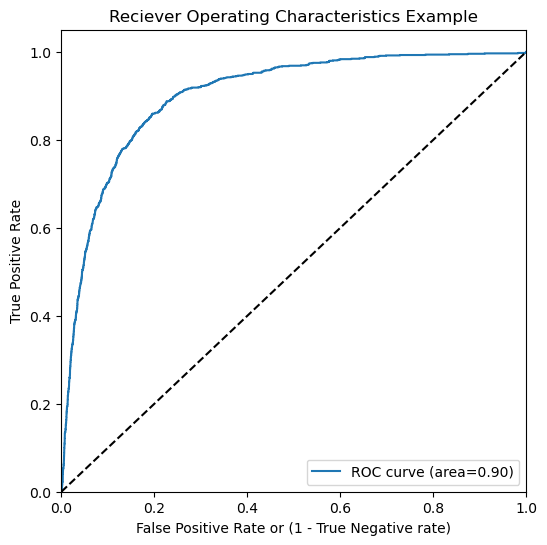

In [150]:
roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)

In [151]:
accuracy = {}

feature_selection = LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]], y_train)
ACC = feature_selection.score(x_test[x_test.columns[rfe.support_]], y_test)*100

accuracy['Logistic Regression after feature Selection'] = ACC

print('Test Accuracy = ', ACC)

Test Accuracy =  90.0364923144974


In [152]:
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy = ",acc)

Test Accuracy =  89.92590954329316


In [153]:
y_predict = lr.predict(x_test)
y_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])

print("Without Feature Selection ", '\n', cm(y_test, y_predict))
print("After Feature Selection ",'\n', cm(y_test, y_pred))

Without Feature Selection  
 [[7764  212]
 [ 699  368]]
After Feature Selection  
 [[7780  196]
 [ 705  362]]


In [154]:
print("Classification Report\n")

print("Without Feature Selection ", '\n', report(y_test, y_predict))
print("After Feature Selection ",'\n', report(y_test, y_pred))

Classification Report

Without Feature Selection  
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7976
           1       0.63      0.34      0.45      1067

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043

After Feature Selection  
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7976
           1       0.65      0.34      0.45      1067

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



predict_proba method

In [155]:
lr.predict_proba(x)[:,1]

array([0.01993133, 0.01206152, 0.00325747, ..., 0.98404356, 0.1154781 ,
       0.11616067])

Checking for Overfitting and Underfitting:

In [156]:
print("Training set score: ", lr.score(x_train, y_train)*100)
print("Testing set score: ", lr.score(x_test, y_test)*100)

Training set score:  90.10451227604513
Testing set score:  89.92590954329316


The Traing set score is 90% and Testing set score is 89.9%, so there is not much difference in the accuracy. Therefore we can say that the model is Perfect Fit

Comparing Model Accuracy with Null Accuracy:

Our Model Accuracy is 90.1%, but we cannot say that our model is good based on the Accuracy that we got. We should also compare it with Null Accuracy. <br> <br>
<b> Null Accuracy: </b> It is the accuracy that could be achieved by predicting the most frequent class

In [157]:
y_test.value_counts()

0    7976
1    1067
Name: y, dtype: int64

In [158]:
print("Mean of 0's", 1-y_test.mean())
print("\n Percentage of 0's ", np.round(1-y_test.mean() ,2)*100,"%")

Mean of 0's 0.8820081831250691

 Percentage of 0's  88.0 %


In [159]:
y_test.value_counts().head()/len(y_test)

0    0.882008
1    0.117992
Name: y, dtype: float64

This shows that, the model that predict 0 would be 88% correct of all the time. <br>
    * This shows how classification accuracy is not good as it is close to a dumb model.<br>
    * It is a good way to know the minimum we should achieve with our model.

Confusion Matrix: 

In [160]:
y_predict = lr.predict(x_test)
print(cm(y_test, y_predict))

[[7764  212]
 [ 699  368]]


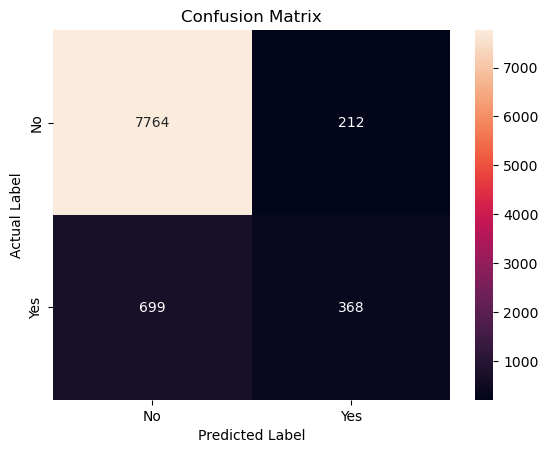

In [161]:
cm_df = cm(y_test, y_predict)
class_label = ['No', 'Yes']
df_cm = pd.DataFrame(cm_df, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')

plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel("Actual Label")
plt.show()

In [162]:
y_predict = lr.predict(x)
print(cm(y, y_predict))

[[38908  1014]
 [ 3476  1813]]


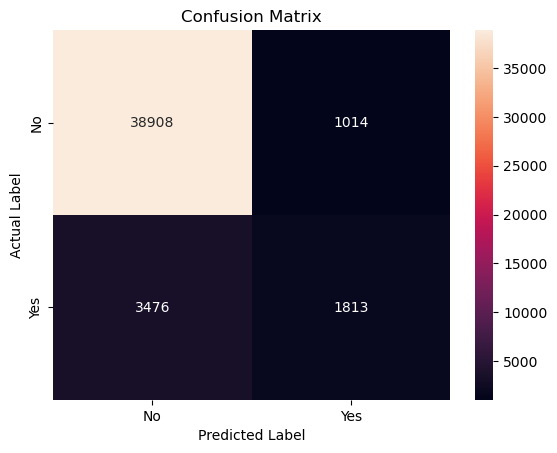

In [163]:
cm_df = cm(y, y_predict)
class_label = ["No", 'Yes']
df_cm = pd.DataFrame(cm_df, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [164]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [165]:
confusion_matrix(y_test, y_pred)

array([[7780,  196],
       [ 705,  362]], dtype=int64)

True Positive (TP)=362--> we correctly predicted that they do have subscription<br>
True Negative (TN)=7780--> we correctly predicted that they do have subscription<br>
False Positive (FP)=705---> Type I Error : we incorrectly predicted that they do have subscription <br>
False Negative (FN) = 196---> Type II Error: we incorrectly predicted that they dont have subscription.



In [166]:
TP = 362
TN = 7780
FP = 705
FN = 796

In [167]:
classification_error = (FP+FN)/float(TP+TN+FP+FN)
print(classification_error)

0.15565695323032253


In [168]:
recall = TP/float(FN+TP)
print(recall)

0.3126079447322971


In [169]:
specificity = TN/(TN + FP)
print(specificity)

0.9169121979964644


In [170]:
false_positive_rate = FP/float(TN + FP)
print(false_positive_rate)

0.08308780200353565


In [171]:
precision = TP/float(TP+FP)
print(precision)

0.3392689784442362


In [172]:
f1_score = 2*((precision*recall)/(precision+recall))
print(f1_score)

0.32539325842696626


Threshold Level:

In [173]:
y_pred_prob = lr.predict_proba(x_test)[0:10]
y_pred_prob

array([[0.9197415 , 0.0802585 ],
       [0.98500075, 0.01499925],
       [0.98488496, 0.01511504],
       [0.51683771, 0.48316229],
       [0.03717018, 0.96282982],
       [0.98043779, 0.01956221],
       [0.32411668, 0.67588332],
       [0.95152765, 0.04847235],
       [0.97435529, 0.02564471],
       [0.96008493, 0.03991507]])

In [174]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=["Prob of no Subscription(0)","Prob of Subscription(1) "])
y_pred_prob_df

,Prob of no Subscription(0),Prob of Subscription(1)
0,0.919742,0.080258
1,0.985001,0.014999
2,0.984885,0.015115
3,0.516838,0.483162
4,0.037170,0.962830
5,0.980438,0.019562
6,0.324117,0.675883
7,0.951528,0.048472
8,0.974355,0.025645
9,0.960085,0.039915


Text(0, 0.5, 'Frequency')

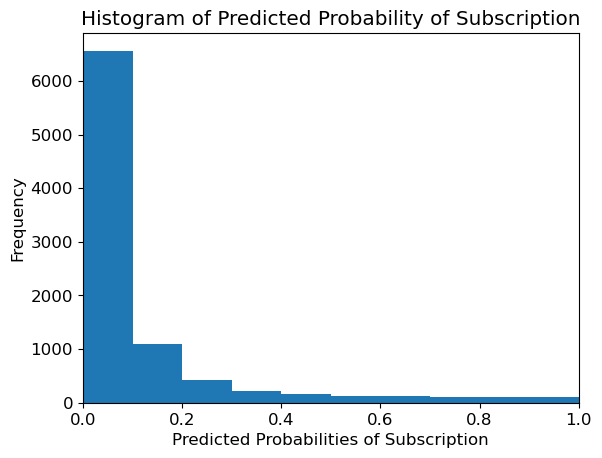

In [175]:
y_pred1 = lr.predict_proba(x_test)[:,1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins=10)
plt.title("Histogram of Predicted Probability of Subscription")
plt.xlim(0,1)
plt.xlabel('Predicted Probabilities of Subscription')
plt.ylabel('Frequency')

Lower the Threshold: 

In [176]:
from sklearn.preprocessing import binarize

In [177]:
for i in range(1,5):
    cm1=0
    y_pred1 = lr.predict_proba(x_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold = i/10)
    
    cm1 = cm(y_test, y_pred2)
    
    print("With",i/10,"threshold the Confusion Matrix is \n",cm1, "\n\n",
         "with", cm1[0,0]+cm1[1,1],"are the correct prediction, ","\n\n",
         cm1[0,1],"Type 1 Error(False Positive), ","\n\n",
         cm1[1,0],"Type II Error(False Negative),","\n\n",
         "Accuracy: ", (ac(y_test, y_pred2)), "\n\n",
         "Sensitivity: ",cm1[1,1]/(float(cm1[1,1]+cm1[1,0])),"\n\n",
         "Specificity: ",cm1[0,0]/(float(cm1[0,0]+cm1[0,1])), "\n\n",
         "****************************************************", "\n\n")

With 0.1 threshold the Confusion Matrix is 
 [[6418 1558]
 [ 142  925]] 

 with 7343 are the correct prediction,  

 1558 Type 1 Error(False Positive),  

 142 Type II Error(False Negative), 

 Accuracy:  0.8120092889527811 

 Sensitivity:  0.8669165885660731 

 Specificity:  0.8046639919759278 

 **************************************************** 


With 0.2 threshold the Confusion Matrix is 
 [[7297  679]
 [ 370  697]] 

 with 7994 are the correct prediction,  

 679 Type 1 Error(False Positive),  

 370 Type II Error(False Negative), 

 Accuracy:  0.8839986730067455 

 Sensitivity:  0.6532333645735707 

 Specificity:  0.9148696088264794 

 **************************************************** 


With 0.3 threshold the Confusion Matrix is 
 [[7577  399]
 [ 514  553]] 

 with 8130 are the correct prediction,  

 399 Type 1 Error(False Positive),  

 514 Type II Error(False Negative), 

 Accuracy:  0.899037929890523 

 Sensitivity:  0.5182755388940956 

 Specificity:  0.94997492477432

* In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class prediction. <br>
* Threshold can be adjusted to increase sensitivity or specificity. <br>
* Sensitivity and Specificity are inverse proportional to each other. <br>
* We can see that increasing the threshold lvel resulting the increased the Accuracy.<br>

ROC - AUC : <br>

ROC Curve stands for Receive Operating Characteristics Curve. An ROC Curve is a plot which shows the performance of the classification model at various classififcation threshold levels. 

In [179]:
final_prediction = lr.predict_proba(x)[:,1]
fpr, tpr, threshold = roc_curve(y, lr.predict_proba(x)[:,1])

accuracy_ls = []
for i in thresholds:
    y_pred = np.where(final_prediction>i, 1, 0)
    accuracy_ls.append(ac(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1540,0.420969,0.901993
1579,0.412840,0.901971
1527,0.424971,0.901949
1578,0.412879,0.901949
1580,0.412582,0.901949


Predictions: 

In [183]:
y_pred = lr.predict(x)

predict = pd.DataFrame({"Actual":y, "Predicted":y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [ ]:
#df = pd.concat([df, predict])